> Data Science HW01-03
# 六都首長數位足跡－－以台中市為例
---

**目的**：   
視覺化2018年1月至2019年1月間，有關林佳龍與盧秀燕的網路聲量，包含總回應數量（All Reaction Count）、回覆數量（Comment Count）、分享數量（Share Count），分析資料所隱含的資訊。
- 貼文數對比
- 各回應數對比

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import os

from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#匯入並清理資料
path = "C:\\Users\\User\\atwolin\\大學\\一下\\DataScienceProgramming\\HW\\HW01-03"
dirs = os.listdir(path)

rows = []
for file in dirs[1:14]:
    rawfile = pd.read_csv(file).drop(['Page_ID', 'Link', 'Type', 'LIKE_COUNT', 'WOW_COUNT', 'LOVE_COUNT', 'HAHA_COUNT', 'SAD_COUNT', 'ANGRY_COUNT', 'Link Description', 'created_time'], axis="columns")
    rows.append(rawfile)
    #print(rawfile)
# print(rows)

### 原始資料比較

In [3]:
#將林佳龍、盧秀燕的相關資料提出
def dataFilter(name):
    lists = []
    postList = []
    for rawfile in rows:
        #計算三個數值總數
        data = (rawfile[(rawfile['Page_Name'] == name) | (rawfile['Message'] == name) | (rawfile['Link_Title'] == name)]).sum(numeric_only=True)
        lists.append(data)

        #計算文章數量
        postSeries = (rawfile[(rawfile['Page_Name'] == name) | (rawfile['Message'] == name) | (rawfile['Link_Title'] == name)])
        postList.append(len(postSeries)) 
    post = pd.DataFrame().append(postList)
    post.columns = ['Post_Count']
    
    #彙整成 Dataframe
    eachCount = pd.DataFrame(columns = ['All_Reaction_Count', 'Comment_Count', 'Share_Count']).append(lists)
    eachCount = pd.concat([eachCount, post], axis=1)
    return eachCount

dataLin = dataFilter('林佳龍')
dataLu = dataFilter('盧秀燕')
dataLin, dataLu

(   All_Reaction_Count Comment_Count Share_Count  Post_Count
 0              138710          7666        4248         912
 1              175592         11053        5586        1006
 2              199957         10017        5761        1244
 3              175934          7150        5262         803
 4              176080          8586        5585        1019
 5              160128          8871        5650         818
 6              196554         18929        7607         701
 7              186584         12207        6068         593
 8              169856         13667        5140         518
 9              232969         24017        8191         550
 10             638371         98470       20224         477
 11             398795         68135        9744         100
 12             246139         20314        5318          94,
    All_Reaction_Count Comment_Count Share_Count  Post_Count
 0               35208          2906        2145          44
 1               51410 

<IPython.core.display.Javascript object>


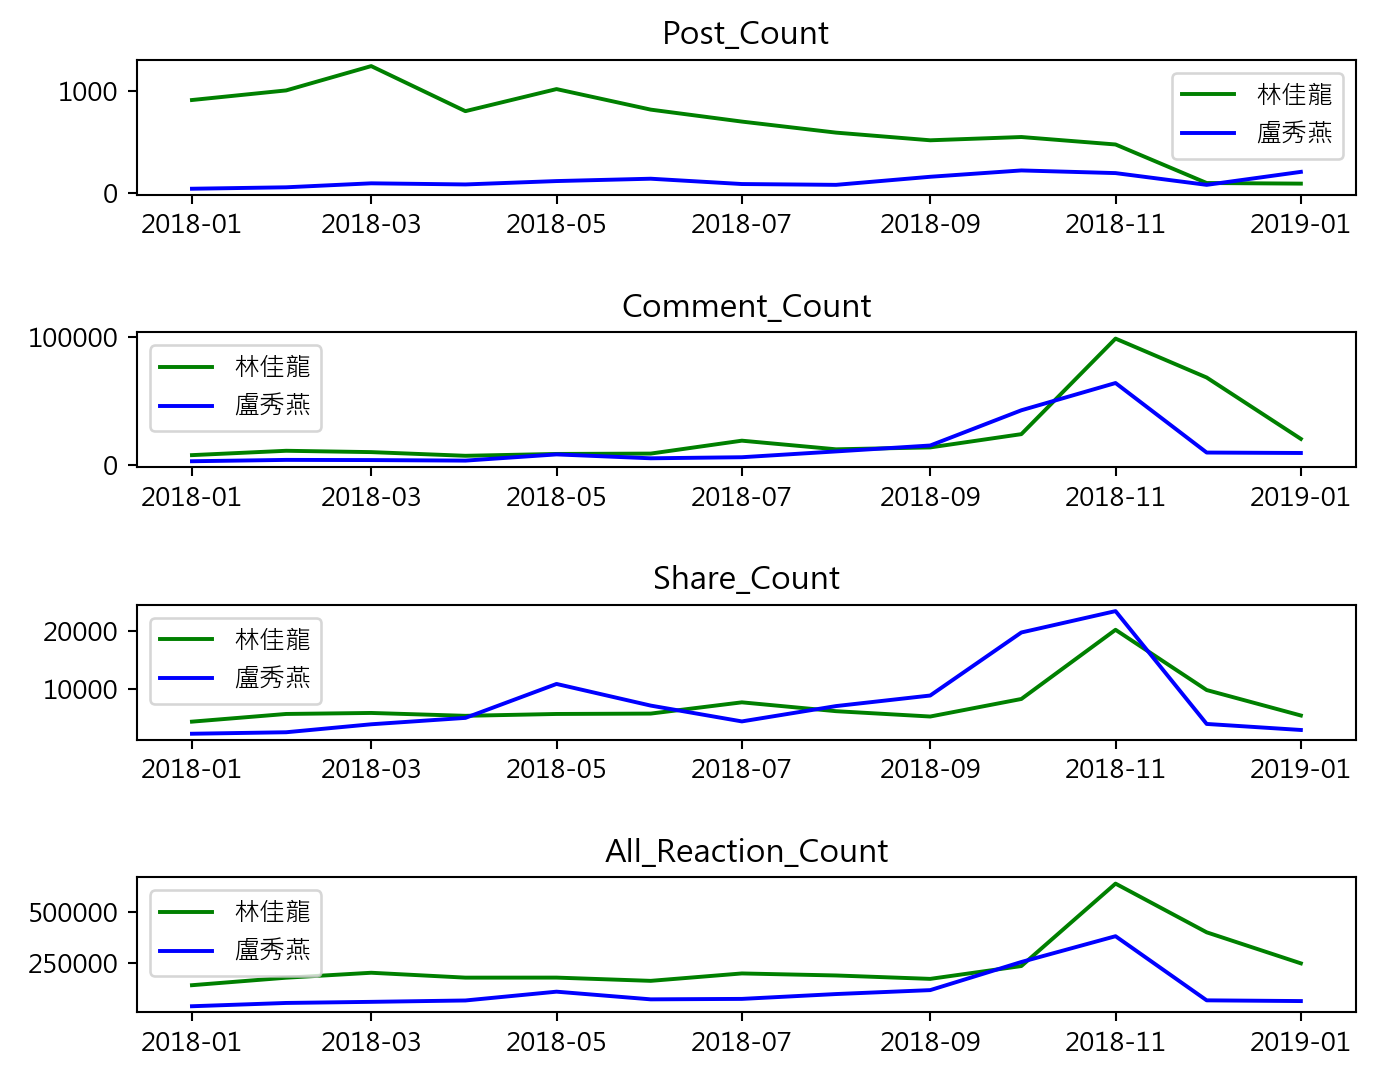

In [4]:
import matplotlib.gridspec as gridspec

gsCount = gridspec.GridSpec(4, 1)
plt.figure(1)
date = pd.period_range('1/2018', periods=13, freq = 'M').to_timestamp().to_pydatetime()

def plot(i, plotName):
    plt.subplot(gsCount[i, :])
    plt.plot(date, dataLin[plotName], label = '林佳龍', color = 'g')
    plt.plot(date, dataLu[plotName], label = '盧秀燕', color = 'b')
    plt.legend()
    plt.title(plotName)


postCount = plot(0, 'Post_Count')
comment = plot(1, 'Comment_Count')
share = plot(2, 'Share_Count')
allReaction = plot(3, 'All_Reaction_Count')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

林佳龍的網路聲量看似比盧秀燕高很多，回覆數量是盧秀燕就有優勢，但分享數一下是林較高，一下盧較高，總回應數量則是林佳龍領先盧秀燕。11月為選舉月，因此該月的所有項目數量都達到巔峰。   
然而這些數量只是總計，作為網路聲量的代表性不足，因此接著計算每月的平均一篇文章有的總回應數量、回覆數量、分享數量。

In [5]:
#各平均數量
person = pd.DataFrame()
def mean(person, dataname):
    person['All_Reaction_Mean'] = dataname['All_Reaction_Count'] / dataname['Post_Count']
    person['Comment_Mean'] = dataname['Comment_Count'] / dataname['Post_Count']
    person['Share_Mean'] = dataname['Share_Count'] / dataname['Post_Count']
    
    return person

meanLin = mean(person, dataLin)

person = pd.DataFrame()
meanLu = mean(person, dataLu)

meanLin, meanLu

(   All_Reaction_Mean Comment_Mean Share_Mean
 0            152.094       8.4057    4.65789
 1            174.545      10.9871    5.55268
 2            160.737      8.05225    4.63103
 3            219.096      8.90411    6.55293
 4            172.797      8.42591    5.48086
 5            195.756      10.8447    6.90709
 6            280.391      27.0029    10.8516
 7            314.644      20.5852    10.2327
 8            327.907      26.3842    9.92278
 9             423.58      43.6673    14.8927
 10            1338.3      206.436    42.3983
 11           3987.95       681.35      97.44
 12            2618.5      216.106    56.5745,
    All_Reaction_Mean Comment_Mean Share_Mean
 0            800.182      66.0455      48.75
 1            886.379      68.1379    41.4483
 2            585.959      39.3093    39.0825
 3            739.628      39.4651    57.0116
 4            898.176      69.1597    90.7983
 5            486.972      36.6338    49.5775
 6            793.156      66.977

<IPython.core.display.Javascript object>


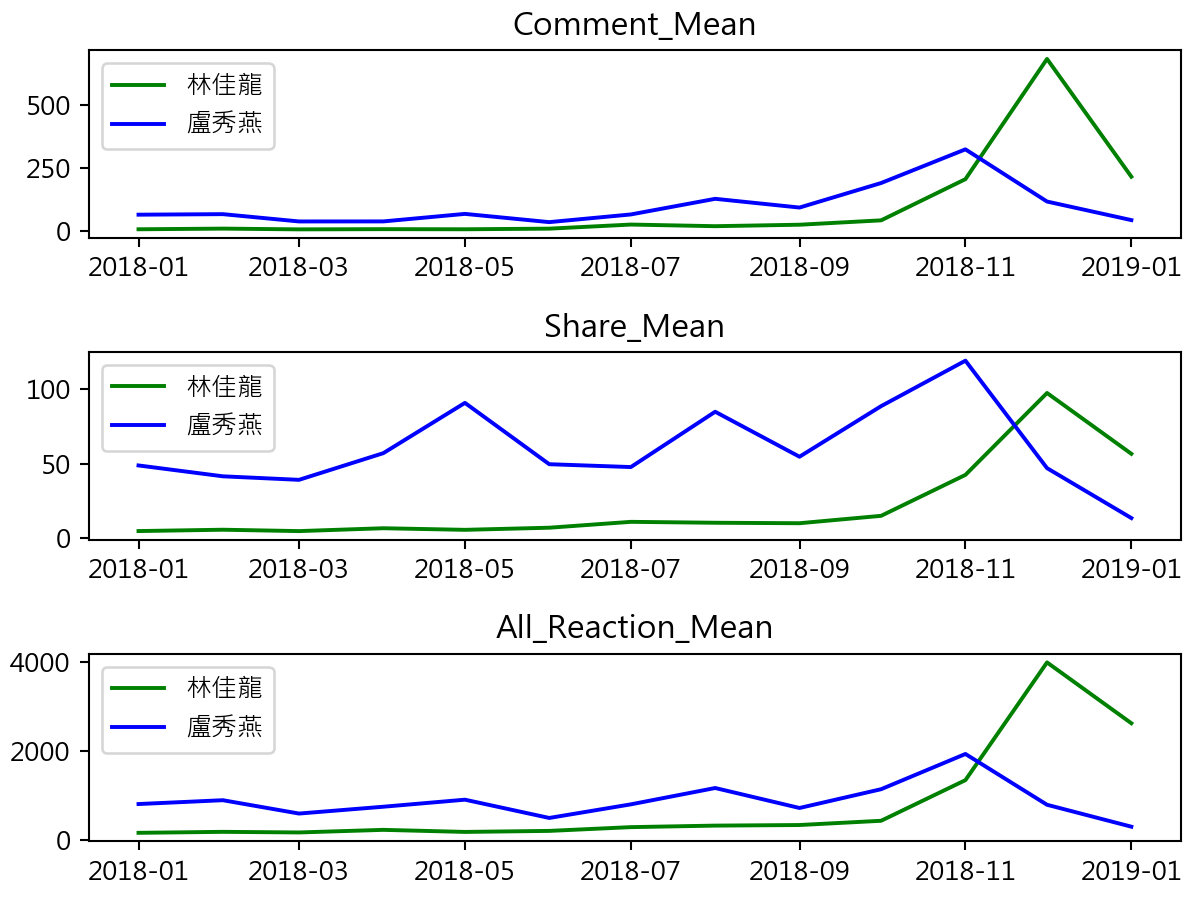

In [6]:
gsMean = gridspec.GridSpec(3, 1)
plt.figure(2)

def plot(i, plotName):
    plt.subplot(gsMean[i, :])
    plt.plot(date, meanLin[plotName], label = '林佳龍', color = 'g')
    plt.plot(date, meanLu[plotName], label = '盧秀燕', color = 'b')
    plt.legend()
    plt.title(plotName)


commentMean = plot(0, 'Comment_Mean')
shareMean = plot(1, 'Share_Mean')
allReactionMean = plot(2, 'All_Reaction_Mean')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

由平均數看出，雖然林佳龍在大選前（11月）的文章數量比盧秀燕高出許多，但是平均每一篇得到的三個數值卻都比盧秀燕低，換句話說，林佳龍的文章CP值低於盧秀燕。   
但是，或許不乏有差距極大的各值數量，因此接著把每月中各個文章的總回應數量低於100的項目剔除。

### 篩選資料（All_Reaction_Count > 100）

In [7]:
def uponData(name):
    uponList = []
    postList = []
    for rawfile in rows:
        data = (rawfile[(rawfile['Page_Name'] == name) | (rawfile['Message'] == name) | (rawfile['Link_Title'] == name)])
        upon100 = data[data['All_Reaction_Count'] > 100]
        data = upon100.sum(numeric_only=True)
        uponList.append(data)
        
        postList.append(len(upon100)) 
        post = pd.DataFrame().append(postList)
        post.columns = ['Post_Count']    
    #     print(postList)
    
        upon = pd.DataFrame(columns = ['All_Reaction_Count', 'Comment_Count', 'Share_Count']).append(uponList)
        upon = pd.concat([upon, post], axis=1)
    
    return upon
uponLin = uponData('林佳龍')
uponLu = uponData('盧秀燕')

uponLin, dataLin

(   All_Reaction_Count Comment_Count Share_Count  Post_Count
 0              133770          7593        4233          51
 1              168711         10945        5452          68
 2              192997          9970        5684          86
 3              170426          7024        5116          52
 4              169336          8504        5430          71
 5              155882          8819        5567          66
 6              191620         18826        7458          77
 7              182656         12132        5931          55
 8              166805         13603        5039          57
 9              228382         23937        8060          83
 10             634965         98412       20085         139
 11             398095         68127        9725          68
 12             244819         20282        5272          53,
    All_Reaction_Count Comment_Count Share_Count  Post_Count
 0              138710          7666        4248         912
 1              175592 

<IPython.core.display.Javascript object>


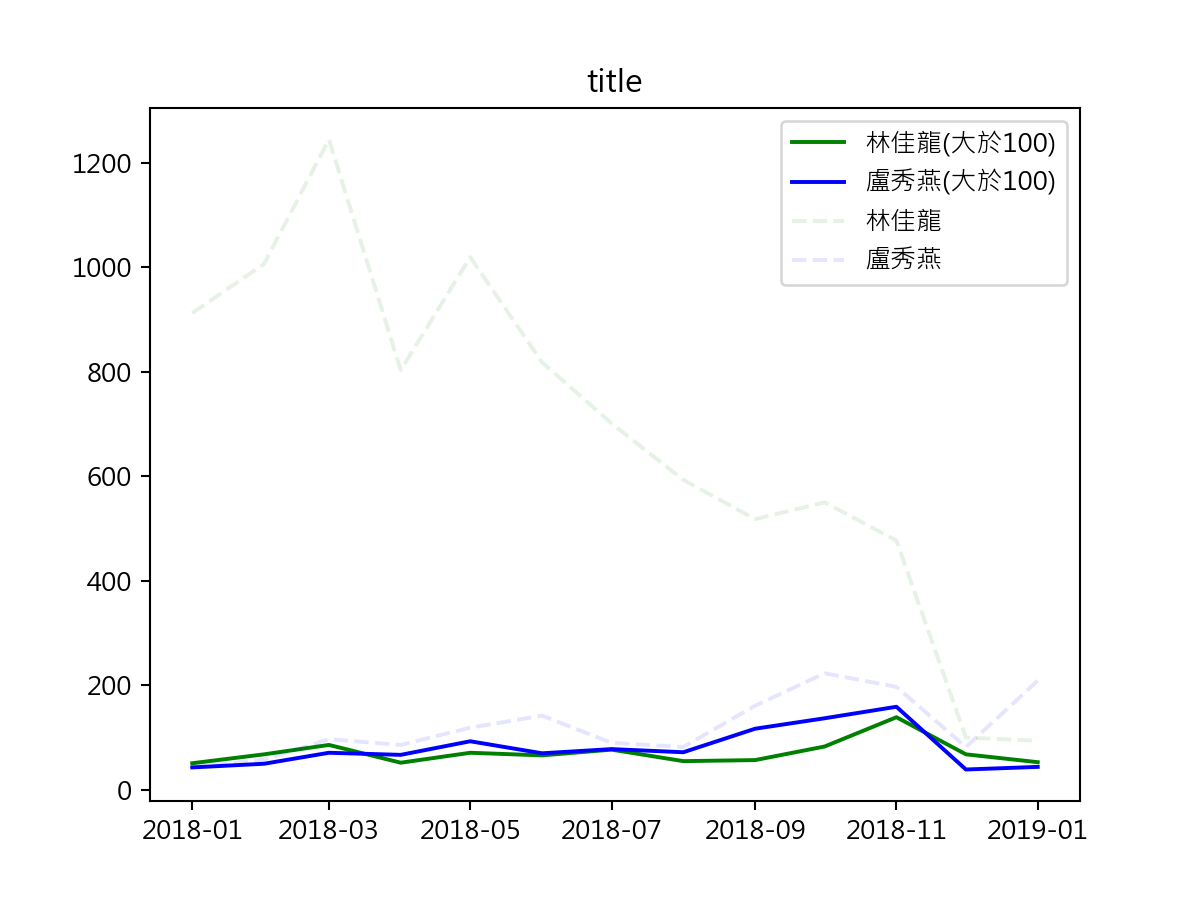

In [8]:
plt.figure(3)

plt.plot(date, uponLin['Post_Count'], label = '林佳龍(大於100)', color = 'g')
plt.plot(date, uponLu['Post_Count'], label = '盧秀燕(大於100)', color = 'b')
plt.plot(date, dataLin['Post_Count'], label = '林佳龍', color = 'g', linestyle='--', alpha=0.1)
plt.plot(date, dataLu['Post_Count'], label = '盧秀燕', color = 'b', linestyle='--', alpha=0.1)
    
plt.legend()
plt.title('title')


plt.show()


原本林佳龍的網路聲量遠高於盧秀燕，剔除後的結果卻被推翻（由此推論除多數都是少量回應的文章！），反而是盧秀燕的網路聲量略勝一籌。   
接著對比剔除前後的三種數值（未平均）

<IPython.core.display.Javascript object>


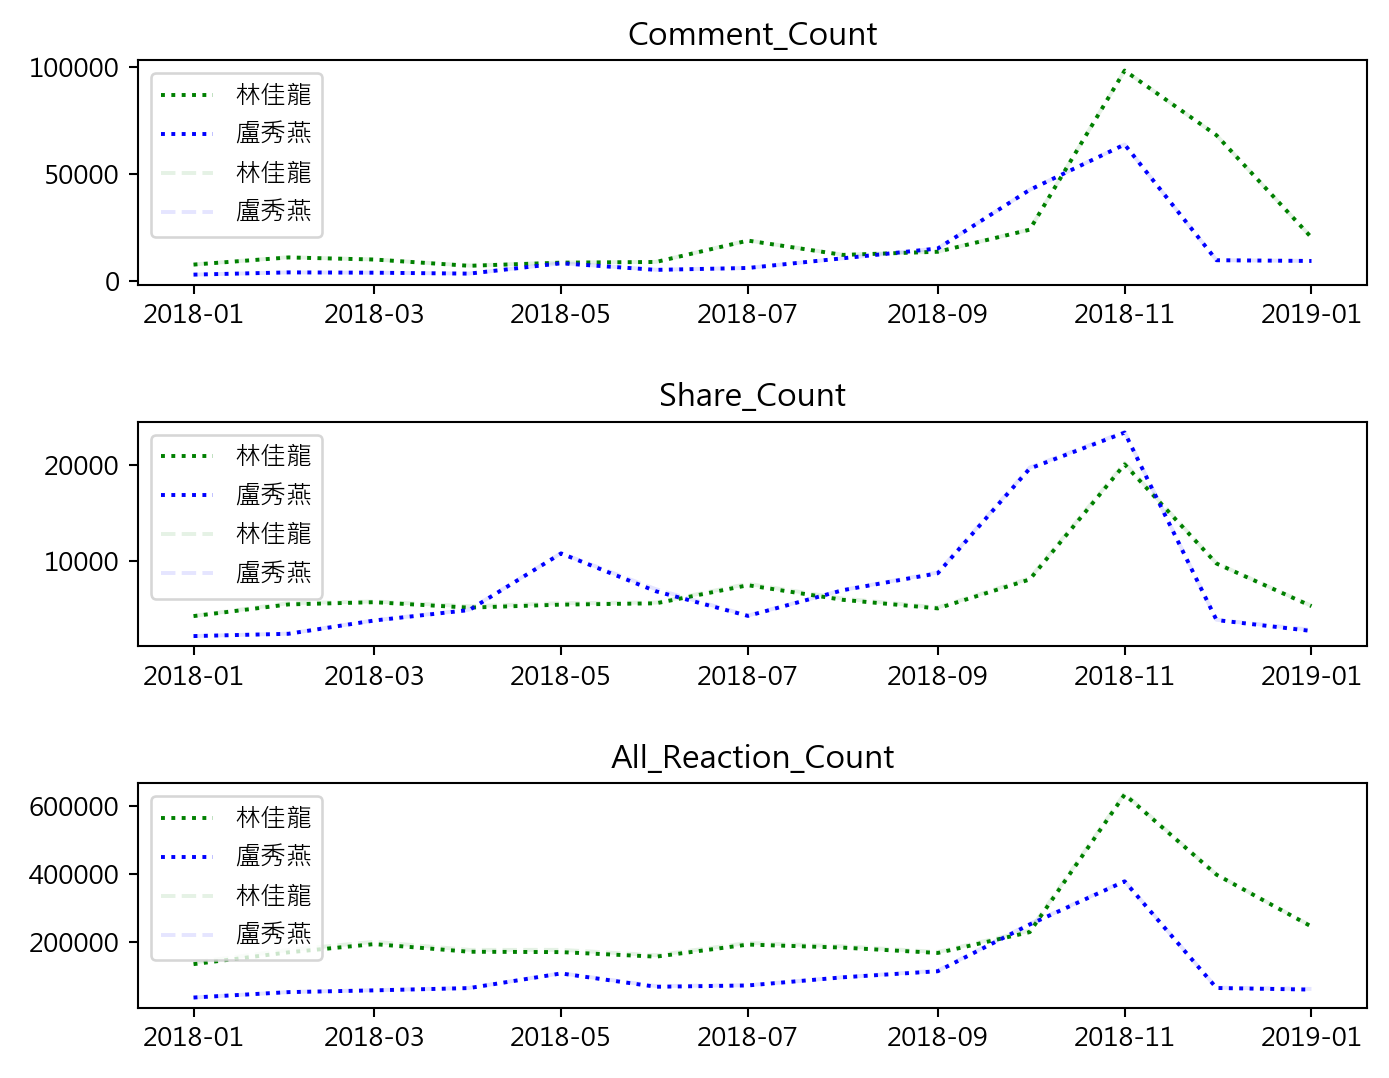

In [9]:
gsCount2 = gridspec.GridSpec(3, 1)
plt.figure(4)

def plot(i, plotName):
    plt.subplot(gsCount2[i, :])
    plt.plot(date, uponLin[plotName], label = '林佳龍', color = 'g', linestyle = ':')
    plt.plot(date, uponLu[plotName], label = '盧秀燕', color = 'b', linestyle = ':')
    plt.plot(date, dataLin[plotName], label = '林佳龍', color = 'g', linestyle = '--', alpha = 0.1)
    plt.plot(date, dataLu[plotName], label = '盧秀燕', color = 'b', linestyle = '--', alpha = 0.1)

    plt.legend()
    plt.title(plotName)

commentCount = plot(0, 'Comment_Count')
shareCount = plot(1, 'Share_Count')
allReactionCount = plot(2, 'All_Reaction_Count')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

因為數量差距太小，比較不明顯，另外嘗試平均值的比較。

In [10]:
person = pd.DataFrame()
mean2Lin = mean(person, uponLin)

person = pd.DataFrame()
mean2Lu = mean(person, uponLu)

mean2Lin, mean2Lu

(   All_Reaction_Mean Comment_Mean Share_Mean
 0            2622.94      148.882         83
 1            2481.04      160.956    80.1765
 2            2244.15       115.93     66.093
 3            3277.42      135.077    98.3846
 4            2385.01      119.775    76.4789
 5            2361.85      133.621    84.3485
 6            2488.57      244.494    96.8571
 7            3321.02      220.582    107.836
 8             2926.4      238.649    88.4035
 9            2751.59      288.398    97.1084
 10           4568.09          708    144.496
 11           5854.34      1001.87    143.015
 12           4619.23      382.679    99.4717,
    All_Reaction_Mean Comment_Mean Share_Mean
 0            816.628      67.3953    49.8837
 1             1022.4        78.96       47.7
 2            792.944      53.5211    53.1268
 3            940.851      50.2388    72.5821
 4            1142.94      88.2151    115.903
 5            955.571      73.2143    97.4714
 6             907.59      77.102

<IPython.core.display.Javascript object>


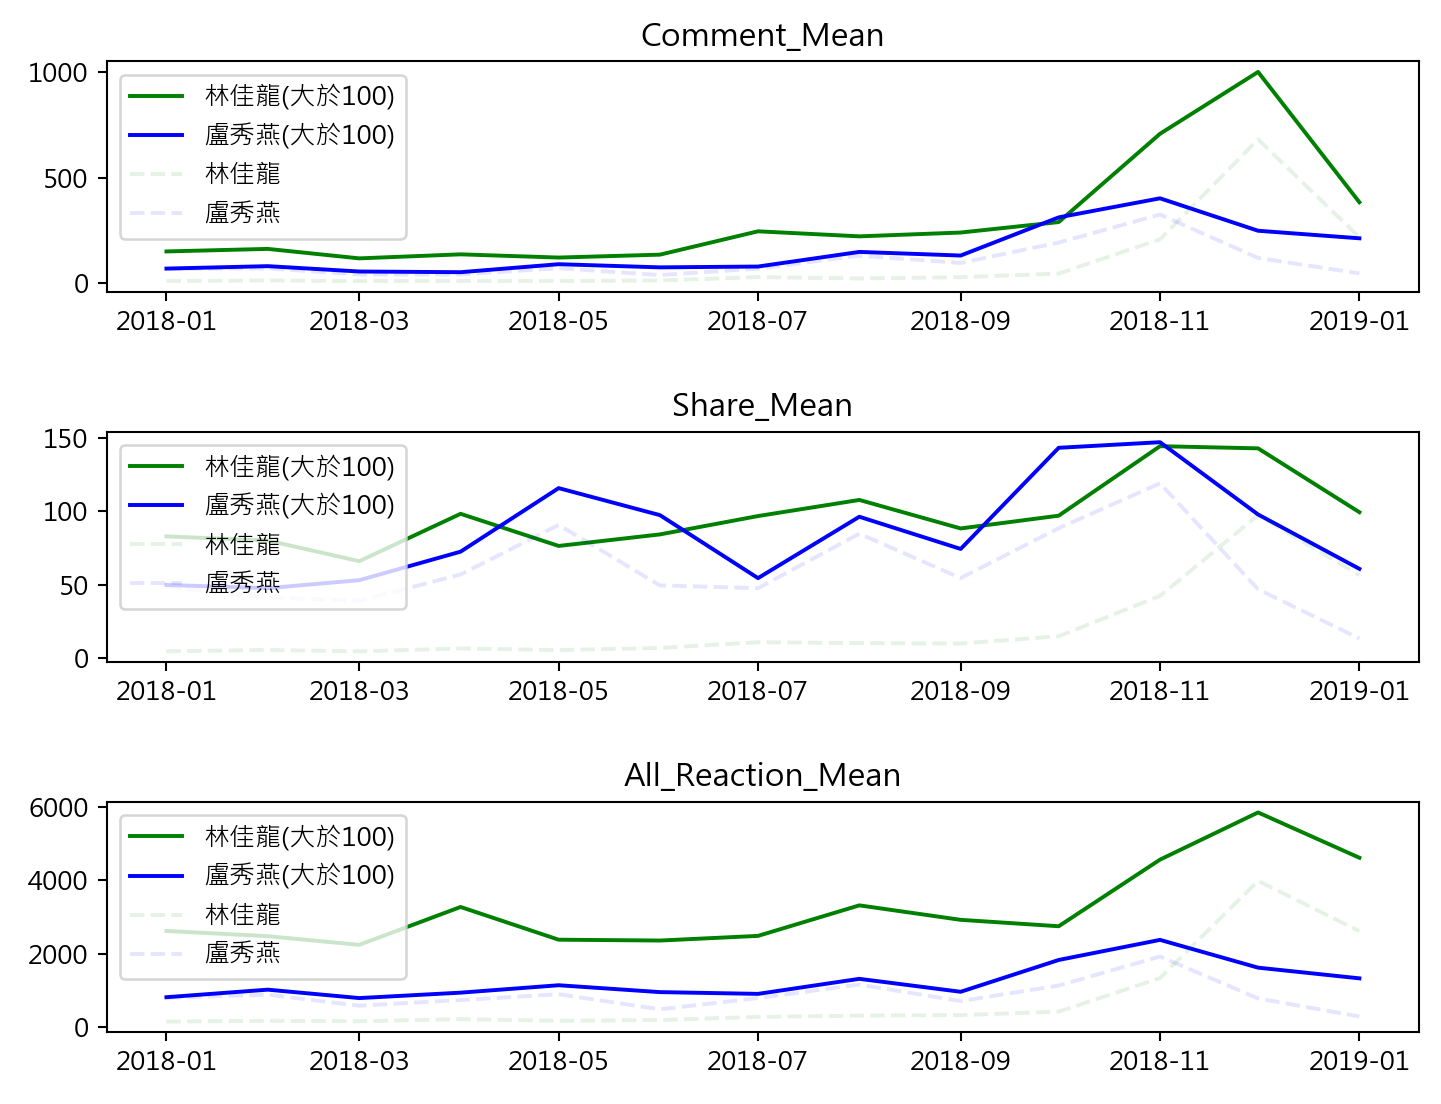

In [11]:
gsMean2 = gridspec.GridSpec(3, 1)
plt.figure(5)

def plot(i, plotName):
    plt.subplot(gsMean2[i, :])
    plt.plot(date, mean2Lin[plotName], label = '林佳龍(大於100)', color = 'g')
    plt.plot(date, mean2Lu[plotName], label = '盧秀燕(大於100)', color = 'b')
    plt.plot(date, meanLin[plotName], label = '林佳龍', color = 'g', linestyle = '--', alpha =0.1)
    plt.plot(date, meanLu[plotName], label = '盧秀燕', color = 'b', linestyle = '--', alpha = 0.1)
    
    plt.legend()
    plt.title(plotName)


commentMean = plot(0, 'Comment_Mean')
shareMean = plot(1, 'Share_Mean')
allReactionMean = plot(2, 'All_Reaction_Mean')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

實質上，林佳龍的回覆數量是高於盧秀燕，不過分享數多是盧秀燕站優勢，林佳龍的總回應數量則遠高於盧秀燕。   
綜而言之，林佳龍雖然有很多的文章數，但大部分回應數量過低，以致於拉低了剔除前的各項目平均數，不過此作業是大略比較與計算兩者的數值，存在疑慮且不精確，影響了最後的結果。